<a href="https://colab.research.google.com/github/Vania-Janet/mi_primer_repositorio/blob/main/Vania_Janet_Raya_Rios_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Vania Janet Raya Rios***
# Factorizacion QR y Solucionadores  

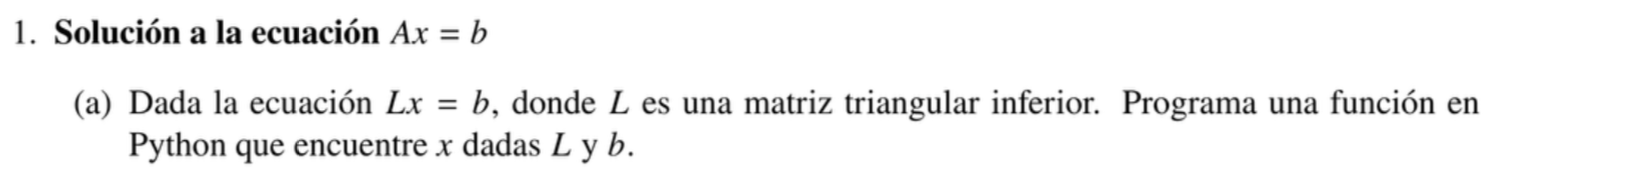

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def lx_b(L, b):
    """
    Resuelve la ecuación Lx = b para x, donde L es una matriz triangular inferior.

    Parameters:
    L (numpy.ndarray): Matriz triángular inferior.
    b (numpy.ndarray): Vector del lado derecho.

    Returns:
    numpy.ndarray: Vector soculción x.
    """
    n = L.shape[0]
    x = np.zeros_like(b, dtype=np.float64) # Arreglo de ceros con la misma forma y tipo de datos que el vector b

    for i in range(n):
        sum_ = 0
        for j in range(i):
            sum_ += L[i, j] * x[j]
        x[i] = (b[i] - sum_) / L[i, i]

    return x

# Ejemplo
L = np.array([[2, 0, 0],
              [3, 1, 0],
              [1, 2, 1]], dtype=np.float64)
b = np.array([4, 5, 6], dtype=np.float64)

x = lx_b(L, b)
print("Solución x:", x)

print(L@x == b)

Solución x: [ 2. -1.  6.]
[ True  True  True]


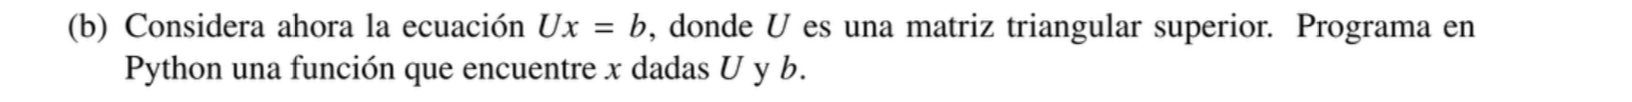

In [ ]:
def ux_b(U, b):
    """
    Resuelve la ecuación Ux = b para x, donde U es una matriz triangular superior.

    Parámetros:
    U (numpy.ndarray): Matriz triangular superior.
    b (numpy.ndarray): Vector del lado derecho.

    Retorna:
    numpy.ndarray: Vector solución x.
    """
    n = U.shape[0]
    x = np.zeros_like(b, dtype=np.float64)

    for i in range(n-1, -1, -1):
        sum_ = 0
        for j in range(i+1, n):
            sum_ += U[i, j] * x[j]
        x[i] = (b[i] - sum_) / U[i, i]

    return x

# Ejemplo
U = np.array([[2, 3, 1],
              [0, 1, 4],
              [0, 0, 5]], dtype=np.float64)
b = np.array([5, 6, 15], dtype=np.float64)

x = ux_b(U, b)
print("Solución x:", x)

print(U@x == b)



Solución x: [10. -6.  3.]
[ True  True  True]


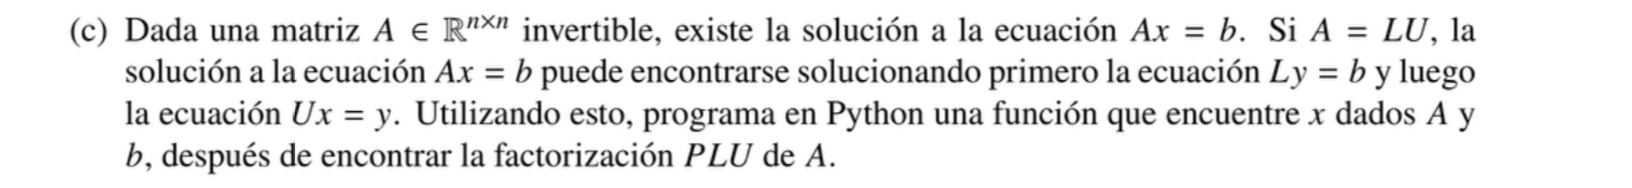

In [ ]:
def plu_factorizacion(A):
    n = A.shape[0]
    P = np.eye(n)
    L = np.eye(n)
    U = A.copy()

    # verificar que la matriz sea cuadrada
    n = len(A)
    for row in A:
        if len(row) != n:
            return "La matriz no es cuadrada, no se puede realizar la factorización PLU."

    for i in range(n): # recorre cada columna de A = U
        max_index = np.argmax(np.abs(U[i:, i])) + i

        # si valor máximo no está en la fila actual i, se hace un intercambio de filas.
        if i != max_index:
            U[[i, max_index]] = U[[max_index, i]]
            P[[i, max_index]] = P[[max_index, i]]
            if i > 0:
                L[[i, max_index], :i] = L[[max_index, i], :i]

        for j in range(i+1, n):
            factor = U[j, i] / U[i, i]
            L[j, i] = factor
            U[j, :] = U[j, :] - factor * U[i, :]

    return P, L, U

In [ ]:
A = np.array([[0, 1, 2], [1, 0, 1], [1, 1, 0]])

resultado = plu_factorizacion(A)
if isinstance(resultado, str): # error
    print(resultado)
else:
    P, L, U = resultado
    print("Matriz P")
    print(P)
    print("Matriz L")
    print(L)
    print("Matriz U")
    print(U)
    print(P@L@U == A)

Matriz P
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
Matriz L
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 1. 1.]]
Matriz U
[[ 1  0  1]
 [ 0  1  2]
 [ 0  0 -3]]
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


In [ ]:
def resolver_sistema_plu(A, b):
    """
    Resuelve el sistema Ax = b utilizando la factorización PLU y las funciones lx_b y ux_b anteriormente creadas.

    Parámetros:
    A (numpy.ndarray): Matriz cuadrada A.
    b (numpy.ndarray): Vector b.

    Retorna:
    numpy.ndarray: Vector solución x.
    """
    # Obtener la factorización PLU de A
    P, L, U = plu_factorizacion(A)

    # Aplicar la permutación a b
    Pb = np.dot(P, b)

    # Resolver Ly = Pb usando lx_b
    y = lx_b(L, Pb)

    # Resolver Ux = y usando ux_b
    x = ux_b(U, y)

    return x

# Ejemplo
A = np.array([[4, 3, 2],
              [3, 2, 1],
              [2, 1, 3]], dtype=np.float64)
b = np.array([10, 8, 9], dtype=np.float64)

x = resolver_sistema_plu(A, b)
print("Solución x:", x)

print(A@x == b)


Solución x: [ 5. -4.  1.]
[ True  True  True]


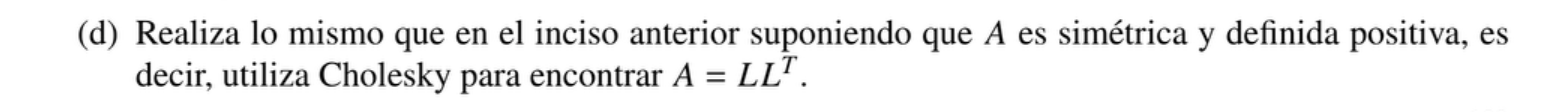

In [ ]:
def cholesky_factorizacion(A):
    n = A.shape[0]
    L = np.zeros_like(A)

    m, n = np.shape(A)
    if m != n:
        raise InvalidInputMatrix('The matrix is not square.')

    if not np.allclose(A, np.transpose(A)):
        return "La matriz no es simétrica."

    for i in range(n):
        temp_sum = np.dot(L[i, :i], L[i, :i])
        diag_element = A[i, i] - temp_sum
        if diag_element <= 0:
            raise ValueError("La matriz no es definida positiva.")
        L[i, i] = np.sqrt(diag_element)

        for j in range(i+1, n):
            temp_sum = np.dot(L[j, :i], L[i, :i])
            L[j, i] = (A[j, i] - temp_sum) / L[i, i]

    return L

In [ ]:
def resolver_sistema_cholesky(A, b):
    """
    Resuelve el sistema Ax = b utilizando la factorización de Cholesky A = LL^T.

    Parámetros:
    A (numpy.ndarray): Matriz simétrica y definida positiva.
    b (numpy.ndarray): Vector b.

    Retorna:
    numpy.ndarray: Vector solución x.
    """
    # Obtener la factorización de Cholesky A = LL^T
    L = cholesky_factorizacion(A)

    # Resolver Ly = b utilizando sustitución hacia adelante con lx_b
    y = lx_b(L, b)

    # Resolver L^T x = y utilizando sustitución hacia atrás con ux_b
    x = ux_b(L.T, y)

    return x

# Ejemplo
A = np.array([[4, 12, -16],
              [12, 37, -43],
              [-16, -43, 98]], dtype=np.float64)
b = np.array([1, 2, 3], dtype=np.float64)

x = resolver_sistema_cholesky(A, b)
print("Solución x:", x)

print(np.allclose(A @ x, b))

Solución x: [28.58333333 -7.66666667  1.33333333]
True


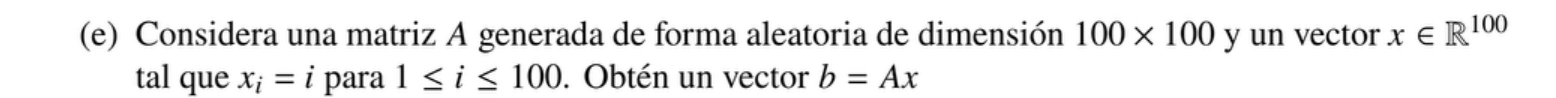

In [ ]:
A = np.random.rand(100, 100)

x = np.arange(1, 101, dtype=np.float64)

b = A @ x

print("Vector b:", b)


Vector b: [2511.53244058 2486.83036608 2531.5762884  2595.00062456 2531.08060346
 2503.87573981 2551.70658776 2568.6233445  2404.7091323  2559.77040119
 2495.69084826 2454.17458497 2863.74818483 2494.00056852 2328.49602109
 2510.19080245 2455.51381316 2420.33716362 2418.14866748 2396.13917277
 2190.64722862 2408.11949121 2370.20290758 2439.29072645 2446.43219711
 2715.90669784 2436.20434407 2669.42404298 2573.0406816  2461.82147897
 2622.30130429 2950.51260193 2931.46203749 2549.50914979 2678.51772827
 2616.41915699 2407.49247259 2452.39623005 2470.22631169 2275.46062682
 2336.78703539 2471.83207962 2377.66756339 2611.55063878 2741.06801886
 2958.51373253 2013.85437467 2233.75451953 2560.41643558 2642.9767324
 2278.67590727 2230.69475283 2310.47427417 2283.65067848 2723.11898631
 2491.05602477 2747.94490805 2625.32794083 2332.94986633 2509.18926371
 2579.80456096 2465.71211482 2279.17119343 2603.32540207 2282.19415644
 2791.74716337 2406.95679199 2653.26421002 2544.41267224 2707.335554

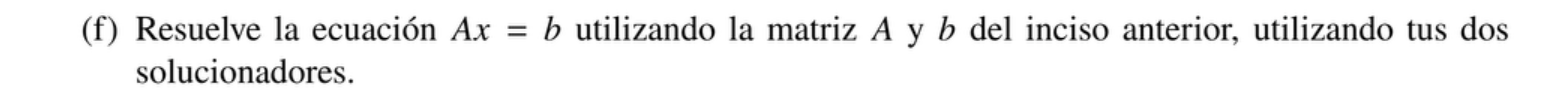

In [ ]:
# Matriz A generada aleatoriamente y vector b del inciso anterior
np.random.seed(42)
A = np.random.rand(100, 100)
x_original = np.arange(1, 101, dtype=np.float64)

# Como A es aleatoria, en general no será simétrica ni definida positiva, por lo que en este caso usaremos N= A@A.T
N= A@A.T

b_N = N@x_original  # Calcular el vector b

# Solucionador PLU
x_plu = resolver_sistema_plu(N, b_N)
print("Solución x usando PLU:", x_plu)

print("¿A @ x_plu ≈ b?:", np.allclose(N @ x_plu, b_N))

# Solucionador Cholesky (N simétrica y definida positiva)
x_cholesky = resolver_sistema_cholesky(N, b_N)
print("Solución x usando Cholesky:", x_cholesky)
print("¿N @ x_cholesky ≈ b?:", np.allclose(N @ x_cholesky, b_N))


Solución x usando PLU: [ 0.99999999  2.          3.          4.          5.          6.
  7.          8.          9.         10.         11.         12.
 13.         14.         15.         16.         17.         18.
 19.         20.         21.         22.         23.         24.
 25.         26.         27.         28.         29.         30.
 31.         32.         33.         34.         35.         36.
 37.         38.00000001 39.         40.         41.         42.
 43.         44.         45.         46.         47.         48.
 49.         50.         51.         52.         53.         54.
 55.         56.         57.         58.         59.         60.
 61.         62.         63.         64.         65.         66.
 67.         68.         69.         70.         71.         72.
 73.         74.         75.00000001 76.         77.         78.
 79.         80.         81.         82.         83.         84.
 85.         86.00000001 87.         87.99999999 89.         90.
 9

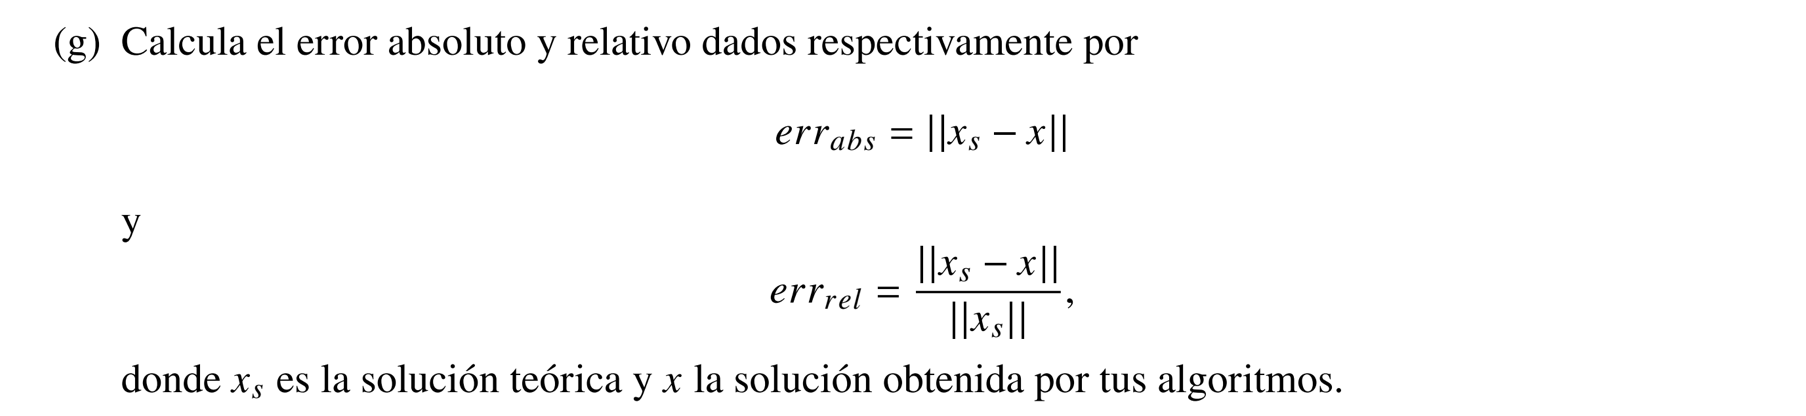

In [ ]:
def calcular_errores(x_teorico, x_calculado):
    """
    Calcula el error absoluto y el error relativo entre la solución teórica y la solución calculada por los solucionadores.

    Parámetros:
    x_teorico (numpy.ndarray): Vector solución teórica x_s.
    x_calculado (numpy.ndarray): Vector solución calculada x.

    Retorna:
    tuple: error absoluto, error relativo
    """

    error_absoluto = np.linalg.norm(x_teorico - x_calculado)

    error_relativo = error_absoluto / np.linalg.norm(x_teorico)

    return error_absoluto, error_relativo

# Usando los solucionadores...

# Generamos la matriz A y el vector b del ejercicio anterior
np.random.seed(42)
A = np.random.rand(100, 100)
x_original = np.arange(1, 101, dtype=np.float64)  # Vector teórico x_s
# debido a Cholesky la matriz debe de ser definida positiva y simetrica
N= A@A.T
b_N = N @ x_original # Calcular el vector b


# PLU
x_plu = resolver_sistema_plu(N, b_N)
err_abs_plu, err_rel_plu = calcular_errores(x_original, x_plu)
print("Solución usando PLU:", x_plu)
print(f"Error absoluto (PLU): {err_abs_plu}")
print(f"Error relativo (PLU): {err_rel_plu}")

x_cholesky = resolver_sistema_cholesky(N, b_N)
err_abs_cholesky, err_rel_cholesky = calcular_errores(x_original, x_cholesky)
print("Solución usando Cholesky:", x_cholesky)
print(f"Error absoluto (Cholesky): {err_abs_cholesky}")
print(f"Error relativo (Cholesky): {err_rel_cholesky}")

Solución usando PLU: [ 0.99999999  2.          3.          4.          5.          6.
  7.          8.          9.         10.         11.         12.
 13.         14.         15.         16.         17.         18.
 19.         20.         21.         22.         23.         24.
 25.         26.         27.         28.         29.         30.
 31.         32.         33.         34.         35.         36.
 37.         38.00000001 39.         40.         41.         42.
 43.         44.         45.         46.         47.         48.
 49.         50.         51.         52.         53.         54.
 55.         56.         57.         58.         59.         60.
 61.         62.         63.         64.         65.         66.
 67.         68.         69.         70.         71.         72.
 73.         74.         75.00000001 76.         77.         78.
 79.         80.         81.         82.         83.         84.
 85.         86.00000001 87.         87.99999999 89.         90.
 91.

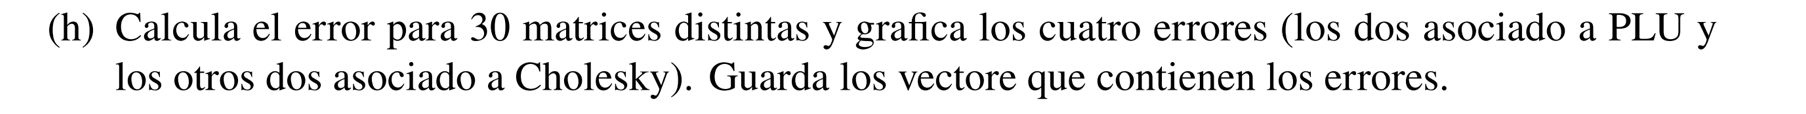

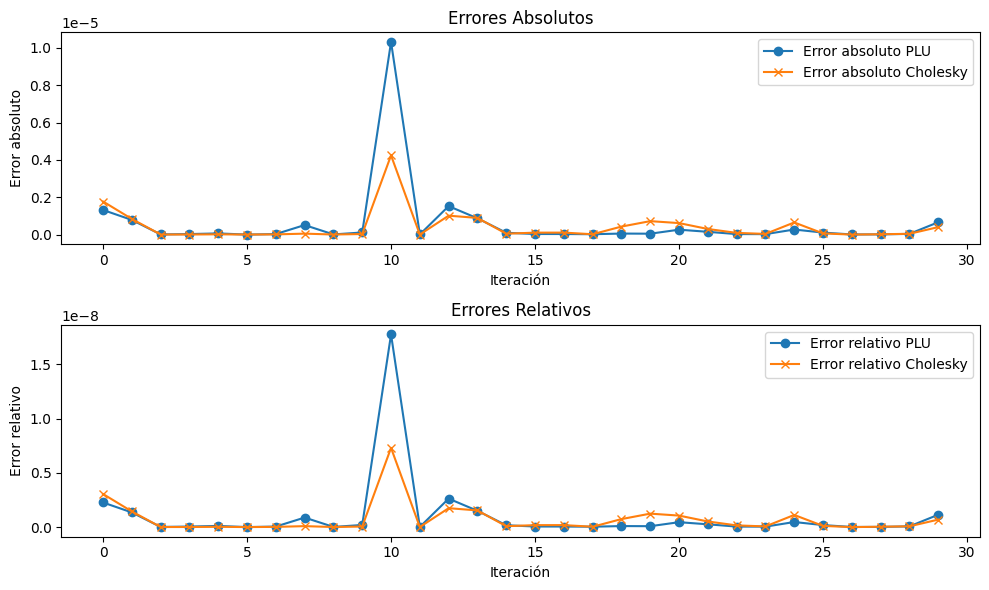

Error absoluto promedio PLU: 5.86635719205479e-07
Error absoluto promedio Cholesky: 4.2349473426426873e-07


In [ ]:
# Guardar los errores en listas
errores_abs_plu = []
errores_rel_plu = []
errores_abs_cholesky = []
errores_rel_cholesky = []

# Calcular errores para 30 iteraciones
for i in range(30):
    # Genera una matriz A aleatoria por cada iteración
    A = np.random.rand(100, 100)

    # Genera el vector teórico x
    x_original = np.arange(1, 101, dtype=np.float64)

    # Calcular para Cholesky
    N = A@A.T
    b_N = N @ x_original


    # Solucionador PLU
    x_plu = resolver_sistema_plu(N, b_N)
    err_abs_plu, err_rel_plu = calcular_errores(x_original, x_plu)
    errores_abs_plu.append(err_abs_plu)
    errores_rel_plu.append(err_rel_plu)


    # Solucionador Cholesky
    x_cholesky = resolver_sistema_cholesky(N, b_N)
    err_abs_cholesky, err_rel_cholesky = calcular_errores(x_original, x_cholesky)
    errores_abs_cholesky.append(err_abs_cholesky)
    errores_rel_cholesky.append(err_rel_cholesky)

# Convertir listas a arrays para que sea más fácil de manipular...
errores_abs_plu = np.array(errores_abs_plu)
errores_rel_plu = np.array(errores_rel_plu)
errores_abs_cholesky = np.array(errores_abs_cholesky)
errores_rel_cholesky = np.array(errores_rel_cholesky)

plt.figure(figsize=(10, 6))

# Graficar errores absolutos
plt.subplot(2, 1, 1)
plt.plot(errores_abs_plu, label='Error absoluto PLU', marker='o')
plt.plot(errores_abs_cholesky, label='Error absoluto Cholesky', marker='x')
plt.title('Errores Absolutos')
plt.xlabel('Iteración')
plt.ylabel('Error absoluto')
plt.legend()

# Graficar errores relativos
plt.subplot(2, 1, 2)
plt.plot(errores_rel_plu, label='Error relativo PLU', marker='o')
plt.plot(errores_rel_cholesky, label='Error relativo Cholesky', marker='x')
plt.title('Errores Relativos')
plt.xlabel('Iteración')
plt.ylabel('Error relativo')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Error absoluto promedio PLU: {np.mean(errores_abs_plu)}")
print(f"Error absoluto promedio Cholesky: {np.mean(errores_abs_cholesky)}")


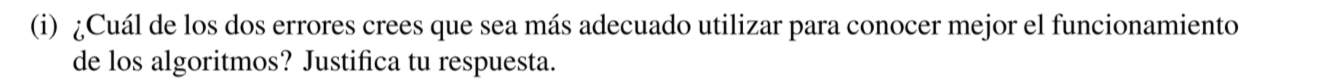

El error relativo, ya que en problemas donde los valores de $x_s$ pueden ser grandes o pequeños, el error absoluto puede dar una falsa impresión de un error significativo cuando, en realidad, el error es pequeño en comparación con el valor esperado. El error relativo normaliza esta diferencia.

Además, el **error relativo** permanece constante cuando el modelo se escala, mientras que el **error absoluto** variará en función de la escala.

Por ejemplo,

Supongamos que tenemos un sistema donde el valor teórico $x_s = 10^6$ (un millón) y el valor calculado es $x = 10^6 + 1$. El error absoluto sería:

$$
\text{Error absoluto} = |10^6 - (10^6 + 1)| = 1
$$

Aquí, el error absoluto es solo 1, pero comparado con un valor tan grande como $x_s = 10^6$, este error parece pequeño e insignificante. Sin embargo, el error relativo sería:

$$
\text{Error relativo} = \frac{|10^6 - (10^6 + 1)|}{|10^6|} = \frac{1}{10^6} = 10^{-6}
$$

Aunque el error absoluto sea pequeño (1), el error relativo indica que este es un error muy pequeño comparado con la magnitud de $x_s$ lo que ayuda a interpetar mejor el sistema.


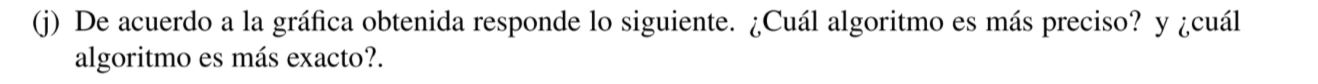

1. **Precisión**:
   - La **precisión** se refiere a qué tan consistente es un algoritmo en producir resultados cercanos entre sí para diferentes instancias del problema.
   - En ambas gráficas, los errores (absolutos y relativos) del *método de Cholesky* parecen ser más consistentes a lo largo de las diferentes iteraciones, lo que significa que el algoritmo tiene menos picos de error. En cambio, el método *PLU* muestra un pico muy alto en algunas iteraciones, especialmente alrededor de la iteración 10 para nuestro ejemplo.

Por lo tanto, el algoritmo **Cholesky** parece ser más **preciso**, ya que los errores no presentan tanta variación a lo largo de las iteraciones.


2. **Exactitud**:
   - La **exactitud** se refiere a qué tan cercano está el resultado obtenido con el algoritmo respecto a la solución teórica $x_s$.
   - En general, aunque ambos algoritmos presentan errores bajos, el *método PLU* tiene un pico de error alto en las iteraciones alrededor de 10 para nuestro ejemplo, lo que indica una menor exactitud en esos puntos. Sin embargo, fuera de ese pico, *PLU* sigue mostrando un error similar al de *Cholesky*.

Por lo tanto, el método de **Cholesky** parece ser más **exacto** en la mayoría de las iteraciones, ya que los errores son más consistentes y más bajos en comparación con los picos de *PLU*.


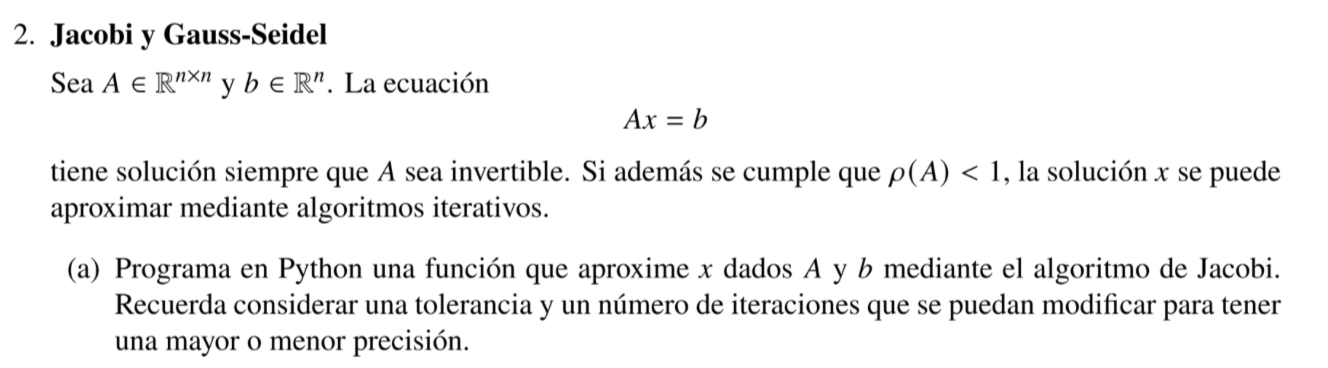

In [ ]:
def Mat_Jacobi(n):
    A = np.random.rand(n, n)
    for i in range(n):
        A[i][i] = np.sum(np.abs(A[i])) + 1
    return A

In [ ]:
def jacobi(A, b, x0=None, tol=1e-10, max_iter=100):
    """
    Resuelve el sistema Ax = b usando el método iterativo de Jacobi.

    Parámetros:
    A (numpy.ndarray): Matriz de coeficientes de tamaño n x n.
    b (numpy.ndarray): Vector de términos independientes.
    x0 (numpy.ndarray): Vector inicial de la solución, por defecto es un vector de ceros.
    tol (float): Tolerancia para el criterio de convergencia.
    max_iter (int): Número máximo de iteraciones.

    Retorna:
    numpy.ndarray: Aproximación de la solución x.
    """
    n = A.shape[0]

    # Si no se da, se inicializa con ceros
    if x0 is None:
        x0 = np.zeros_like(b)

    x = x0.copy()

    # Iterar hasta el número máximo de iteraciones o hasta que se cumpla la tolerancia
    for k in range(max_iter):
        x_new = np.zeros_like(x)

        # Actualizar cada componente de x
        for i in range(n):
            sum_ = 0
            for j in range(n):
                if i != j:
                    sum_ += A[i, j] * x[j]
            x_new[i] = (b[i] - sum_) / A[i, i]

        # Revisar el criterio de convergencia
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            print(f"Convergió en {k+1} iteraciones.")
            return x_new

        x = x_new

    print("Alcanzó el número máximo de iteraciones.")
    return x

# Ejemplo
n = 3
A = Mat_Jacobi(n)
b = np.random.rand(n)  # Vector b aleatorio
x0 = np.zeros(n)  # Vector inicial de ceros
tolerancia = 1e-10
max_iteraciones = 100

x_aprox = jacobi(A, b, x0, tol=tolerancia, max_iter=max_iteraciones)
print("Aproximación de la solución:", x_aprox)

# Verificación
print("Residuo A @ x_aprox - b:", A @ x_aprox - b)

Convergió en 22 iteraciones.
Aproximación de la solución: [ 0.3598373   0.31268006 -0.10587348]
Residuo A @ x_aprox - b: [-4.80571138e-11 -2.89400726e-11 -3.33612617e-11]


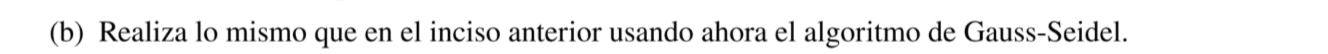

In [ ]:
def gauss_seidel(A, b, x0=None, tol=1e-10, max_iter=100):
    """
    Resuelve el sistema Ax = b usando el método iterativo de Gauss-Seidel.

    Parámetros:
    A (numpy.ndarray): Matriz de coeficientes de tamaño n x n.
    b (numpy.ndarray): Vector de términos independientes.
    x0 (numpy.ndarray): Vector inicial de la solución, por defecto es un vector de ceros.
    tol (float): Tolerancia para el criterio de convergencia.
    max_iter (int): Número máximo de iteraciones.

    Retorna:
    numpy.ndarray: Aproximación de la solución x.
    """
    n = A.shape[0]

    # Si no se da, se inicializa con ceros
    if x0 is None:
        x0 = np.zeros_like(b)

    x = x0.copy()

    # Iterar hasta el número máximo de iteraciones o hasta que se cumpla la tolerancia
    for k in range(max_iter):
        x_new = x.copy()

        # Actualizar cada componente de x
        for i in range(n):
            sum_1 = sum(A[i, j] * x_new[j] for j in range(i))    # Suma de los elementos hasta i-1
            sum_2 = sum(A[i, j] * x[j] for j in range(i+1, n))  # Suma de los elementos desde i+1
            x_new[i] = (b[i] - sum_1 - sum_2) / A[i, i]

        # Revisar el criterio de convergencia
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            print(f"Convergió en {k+1} iteraciones.")
            return x_new

        x = x_new

    print("Alcanzó el número máximo de iteraciones.")
    return x

# Ejemplo
A = np.array([[4, 1, 2],
              [3, 5, 1],
              [1, 1, 3]], dtype=np.float64)
b = np.array([4, 7, 3], dtype=np.float64)
x0 = np.zeros(3)
tolerancia = 1e-10
max_iteraciones = 100

x_aprox_gauss_seidel = gauss_seidel(A, b, x0, tol=tolerancia, max_iter=max_iteraciones)
print("Aproximación de la solución con Gauss-Seidel:", x_aprox_gauss_seidel)
print(A@x_aprox_gauss_seidel - b)

Convergió en 16 iteraciones.
Aproximación de la solución con Gauss-Seidel: [0.5 1.  0.5]
[5.24291721e-11 1.31077371e-11 0.00000000e+00]


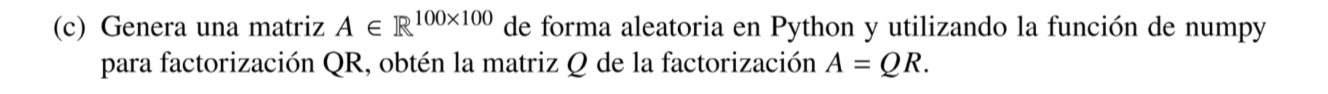

In [ ]:
A = Mat_Jacobi(100)

# Realizar la factorización QR
Q, R = np.linalg.qr(A)

print("Matriz Q de la factorización QR:")
print(Q)

A_ = Q @ R
print("¿Aproximadamente A == QR?", np.allclose(A, A_))


Matriz Q de la factorización QR:
[[-0.99463565  0.02304947  0.01714537 ... -0.00148568  0.01402934
  -0.00242511]
 [-0.01501303 -0.99453293  0.00979703 ...  0.00603464  0.00566169
   0.00154334]
 [-0.00998539 -0.00133044 -0.99472008 ...  0.0073838  -0.00131585
  -0.0033324 ]
 ...
 [-0.00353565 -0.01106636 -0.01182218 ... -0.99705088 -0.00144039
  -0.00903507]
 [-0.01814399 -0.00926355 -0.00285277 ...  0.0039004  -0.99712109
   0.00285417]
 [-0.00646779 -0.0022967  -0.00722406 ... -0.00660031  0.00503687
   0.99743774]]
¿Aproximadamente A == QR? True


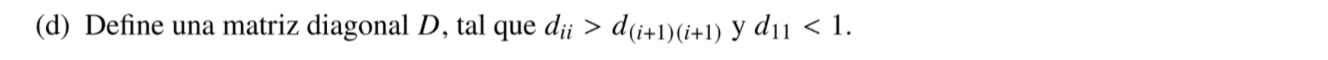

In [ ]:
n = 100

# Da una secuencia decreciente con el primer valor menor que 1
diagonal_values = np.linspace(0.9, 0.1, n)  # Decreciente desde 0.9 hasta 0.1

D = np.diag(diagonal_values)

print("Matriz diagonal D:")
print(D)


Matriz diagonal D:
[[0.9        0.         0.         ... 0.         0.         0.        ]
 [0.         0.89191919 0.         ... 0.         0.         0.        ]
 [0.         0.         0.88383838 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.11616162 0.         0.        ]
 [0.         0.         0.         ... 0.         0.10808081 0.        ]
 [0.         0.         0.         ... 0.         0.         0.1       ]]


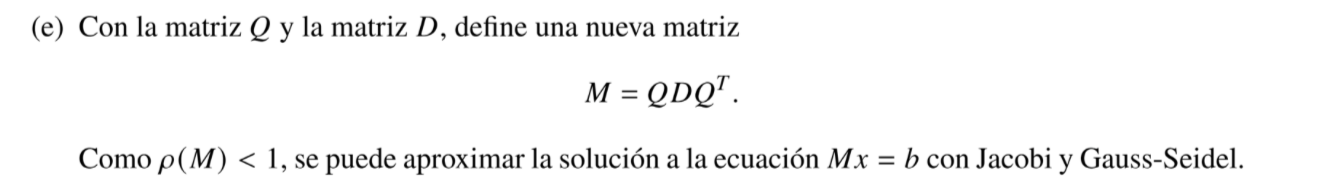

In [ ]:
M = Q @ D @ Q.T

# Mostrar la matriz M
print("Matriz M = QDQ^T:")
print(M)

# Opcional: verificar si la matriz M tiene radio espectral < 1
eigenvalues = np.linalg.eigvals(M)
rho_M = max(abs(eigenvalues))
print(f"Radio espectral de M: {rho_M}")


Matriz M = QDQ^T:
[[ 8.96687790e-01 -2.19121387e-03 -1.52752905e-03 ...  2.54232620e-04
   1.19442258e-02  2.93471471e-03]
 [-2.19121387e-03  8.88641638e-01 -2.10421892e-03 ...  6.13289298e-03
   5.22799144e-03 -2.63287879e-04]
 [-1.52752905e-03 -2.10421892e-03  8.81048535e-01 ...  6.72178599e-03
   1.09783594e-04  3.60825598e-03]
 ...
 [ 2.54232620e-04  6.13289298e-03  6.72178599e-03 ...  1.18714755e-01
   1.40015563e-03  1.47788054e-03]
 [ 1.19442258e-02  5.22799144e-03  1.09783594e-04 ...  1.40015563e-03
   1.10930536e-01  1.18089866e-03]
 [ 2.93471471e-03 -2.63287879e-04  3.60825598e-03 ...  1.47788054e-03
   1.18089866e-03  1.02257496e-01]]
Radio espectral de M: 0.9000000000000034


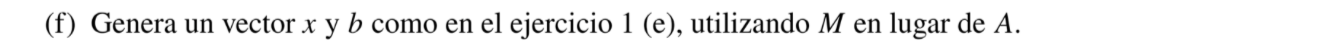

In [ ]:
# vector x tal que x_i = i para 1 <= i <= 100
x = np.arange(1, 101)

b = M @ x

# Mostrar el vector b
print("Vector b = Mx:")
print(b)


Vector b = Mx:
[18.53286442 19.62339779 17.9617516  18.18146816 16.95703783 16.55875545
 24.42721503 24.04326361 21.71458339 19.4274096  22.60512365 24.47378395
 23.84144153 23.10638566 22.05153887 24.22929375 26.87082398 26.06556787
 26.70805611 23.90876152 26.10358341 26.57210112 27.80919276 28.44394684
 28.00578973 26.97213056 25.74820189 28.34677175 28.28336725 29.48815857
 29.98479566 29.74720931 31.08303392 29.61926007 28.65167646 29.55902254
 30.22794207 30.95999601 31.82623551 32.63024638 32.59878364 32.84468429
 31.80881388 30.94874856 31.88796697 31.67927422 33.02658819 32.81112629
 32.7870314  32.5214752  32.23923304 34.09781291 33.2458166  32.78024839
 33.61240435 33.05680023 32.40980538 32.65588093 33.36752619 31.916121
 32.32959373 32.44406971 31.84658341 32.39741068 32.50425509 32.09836144
 32.11491553 31.76576586 31.16778167 31.90630149 31.46169618 30.66988241
 30.23205875 30.50959502 29.57050958 30.3161399  30.20086719 29.63241124
 29.57070134 29.78315    29.85957669 2

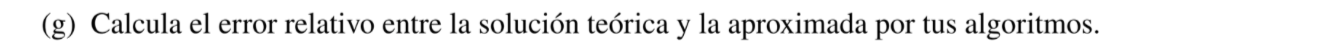

In [ ]:
def calcular_error_relativo(x_teorico, x_aproximado):
    """
    Calcula el error relativo entre la solución teórica y la solución aproximada.

    Parámetros:
    x_teorico (numpy.ndarray): Vector solución teórica.
    x_aproximado (numpy.ndarray): Vector solución calculada.

    Retorna:
    float: Error relativo.
    """
    error_absoluto = np.linalg.norm(x_teorico - x_aproximado)
    error_relativo = error_absoluto / np.linalg.norm(x_teorico)
    return error_relativo


x_teorico = np.arange(1, 101)  # Vector solución teórica

x_aproximado_jacobi = jacobi(M, b)
x_aproximado_gauss_seidel = gauss_seidel(M, b)

# Error relativo para Jacobi
error_relativo_jacobi = calcular_error_relativo(x_teorico, x_aproximado_jacobi)
print(f"Error relativo (Jacobi): {error_relativo_jacobi}")

# Error relativo para Gauss-Seidel
error_relativo_gauss_seidel = calcular_error_relativo(x_teorico, x_aproximado_gauss_seidel)
print(f"Error relativo (Gauss-Seidel): {error_relativo_gauss_seidel}")


Convergió en 50 iteraciones.
Convergió en 14 iteraciones.
Error relativo (Jacobi): 1.4386545649494058e-13
Error relativo (Gauss-Seidel): 1.7657116786896303e-14


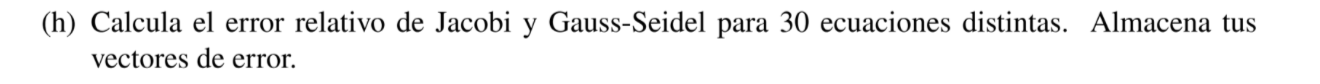

In [ ]:
errores_rel_jacobi = []
errores_rel_gauss_seidel = []

num_iteraciones = 30

x_teorico = np.arange(1, 101) # Vector teorico

for _ in range(num_iteraciones):
    Q = np.random.rand(100, 100)
    Q, _ = np.linalg.qr(Q)  # Para que Q sea ortogonal
    diagonal_values = np.linspace(0.9, 0.1, 100)  # Valores diagonales decrecientes
    D = np.diag(diagonal_values)

    # Definir la matriz M = Q * D * Q^T
    M = Q @ D @ Q.T

    # Calcular b = Mx_teorico
    b = M @ x_teorico

    # Resolver con Jacobi y Gauss-Seidel
    x_aprox_jacobi = jacobi(M, b)
    x_aprox_gauss_seidel = gauss_seidel(M, b)

    # Calcular errores relativos
    error_rel_jacobi = calcular_error_relativo(x_teorico, x_aprox_jacobi)
    error_rel_gauss_seidel = calcular_error_relativo(x_teorico, x_aprox_gauss_seidel)

    errores_rel_jacobi.append(error_rel_jacobi)
    errores_rel_gauss_seidel.append(error_rel_gauss_seidel)

# Listas a arrays
errores_rel_jacobi = np.array(errores_rel_jacobi)
errores_rel_gauss_seidel = np.array(errores_rel_gauss_seidel)

print("Errores relativos (Jacobi):", errores_rel_jacobi)
print("Errores relativos (Gauss-Seidel):", errores_rel_gauss_seidel)


Alcanzó el número máximo de iteraciones.
Convergió en 56 iteraciones.
Alcanzó el número máximo de iteraciones.
Convergió en 58 iteraciones.
Alcanzó el número máximo de iteraciones.
Convergió en 53 iteraciones.
Alcanzó el número máximo de iteraciones.
Convergió en 57 iteraciones.
Alcanzó el número máximo de iteraciones.
Convergió en 56 iteraciones.
Alcanzó el número máximo de iteraciones.
Convergió en 57 iteraciones.
Alcanzó el número máximo de iteraciones.
Convergió en 58 iteraciones.
Alcanzó el número máximo de iteraciones.
Convergió en 57 iteraciones.
Alcanzó el número máximo de iteraciones.
Convergió en 59 iteraciones.
Alcanzó el número máximo de iteraciones.
Convergió en 54 iteraciones.
Alcanzó el número máximo de iteraciones.
Convergió en 56 iteraciones.
Alcanzó el número máximo de iteraciones.
Convergió en 56 iteraciones.
Alcanzó el número máximo de iteraciones.
Convergió en 54 iteraciones.
Alcanzó el número máximo de iteraciones.
Convergió en 58 iteraciones.
Alcanzó el número má

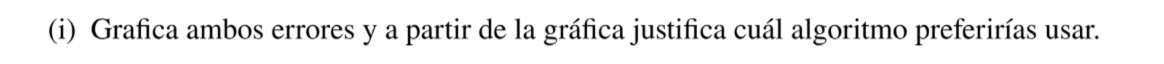

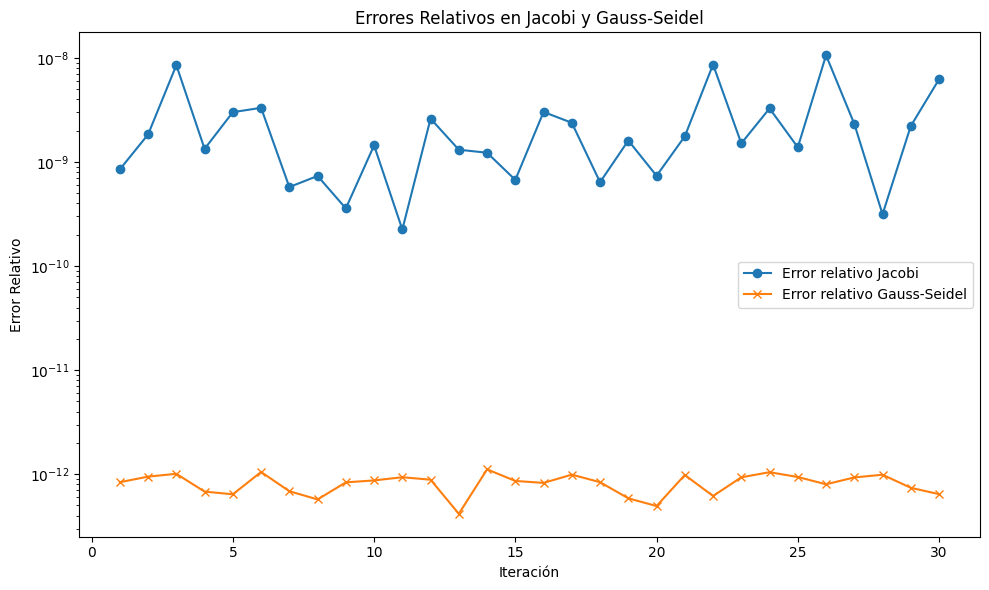

In [ ]:
iteraciones = np.arange(1, 31)
plt.figure(figsize=(10, 6))

# Graficar errores relativos de Jacobi
plt.plot(iteraciones, errores_rel_jacobi, label='Error relativo Jacobi', marker='o')

# Graficar errores relativos de Gauss-Seidel
plt.plot(iteraciones, errores_rel_gauss_seidel, label='Error relativo Gauss-Seidel', marker='x')

plt.title('Errores Relativos en Jacobi y Gauss-Seidel')
plt.xlabel('Iteración')
plt.ylabel('Error Relativo')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()


Notemos que el método de **Gauss-Seidel** muestra errores relativos que están en el orden de $10^{-12}$ y que el método de **Jacobi** muestra errores relativos más grandes (de $10^{-9}$ a $10^{-8}$) entonces podemos inferir que el método de **Gauss-Seidel** es más preciso dado que tiene un error mucho menor por iteración.

Además, el método de **Gauss-Seidel** parece estable ya que 'varia poco' en sus errores relativos de las 30 iteraciones.

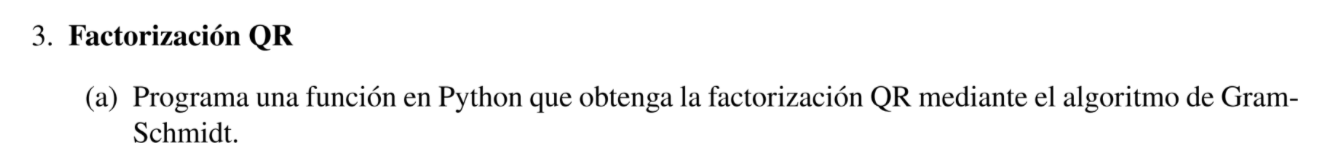

In [ ]:
def gram_schmidt_qr(A):
    """
    Factorización QR utilizando el algoritmo de Gram-Schmidt.

    Parámetros:
    A (numpy.ndarray): Matriz de tamaño m x n.

    Retorna:
    Q (numpy.ndarray): Matriz ortogonal de tamaño m x n.
    R (numpy.ndarray): Matriz triangular superior de tamaño n x n.
    """
    # Dimensiones de la matriz A
    m, n = A.shape

    # Inicializar las matrices Q y R
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        # Vector v_j es la columna j de A
        v = A[:, j]

        # Proyecta v sobre los vectores ya ortogonalizados en Q
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], v)
            v = v - R[i, j] * Q[:, i]

        # Normalizar el vector v
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]

    return Q, R

# Ejemplo
A = np.random.rand(4, 4)
Q, R = gram_schmidt_qr(A)

# Mostrar los resultados
print("Matriz A:")
print(A)
print("\nMatriz Q (ortogonal):")
print(Q)
print("\nMatriz R (triangular superior):")
print(R)

# Verificar que A = QR
A_ = Q @ R
print("\n¿Aproximadamente A == QR?", np.allclose(A, A_))


Matriz A:
[[0.95569658 0.25910862 0.62430828 0.94669994]
 [0.50050982 0.74833513 0.76140385 0.06645077]
 [0.34103016 0.03297795 0.80498481 0.71226391]
 [0.16544322 0.28488703 0.97019056 0.32349966]]

Matriz Q (ortogonal):
[[ 0.83578139 -0.39989073 -0.23498122 -0.29383788]
 [ 0.43770879  0.81855388 -0.21541285  0.30327853]
 [ 0.2982397  -0.24250565  0.6319584   0.67295815]
 [ 0.14468438  0.33353854  0.70640619 -0.60729627]]

Matriz R (triangular superior):
[[ 1.14347675  0.59516506  1.23550825  1.07955099]
 [ 0.          0.59596095  0.50197756 -0.38901141]
 [ 0.          0.          0.88334864  0.44187227]
 [ 0.          0.          0.          0.02484045]]

¿Aproximadamente A == QR? True


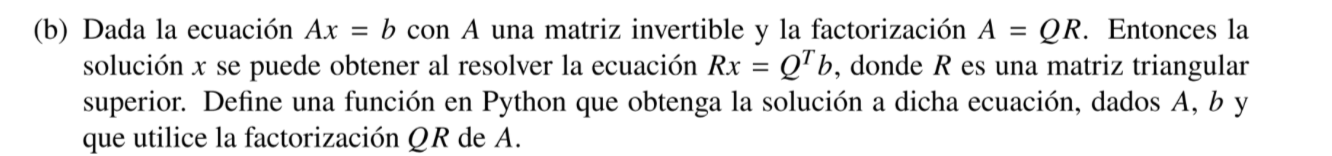

In [ ]:
def resolver_qr(A, b):
    """
    Resuelve la ecuación Ax = b utilizando la factorización QR de A.

    Parámetros:
    A (numpy.ndarray): Matriz de coeficientes de tamaño m x n.
    b (numpy.ndarray): Vector de término independiente de tamaño m.

    Retorna:
    x (numpy.ndarray): Solución del sistema Ax = b.
    """
    Q, R = gram_schmidt_qr(A)

    # Calcular Q^T b
    Q_T_b = np.dot(Q.T, b)

    # Resolver R x = Q^T b
    n = R.shape[1]
    x = np.zeros_like(Q_T_b)
    for i in range(n-1, -1, -1):
        x[i] = (Q_T_b[i] - np.dot(R[i, i+1:], x[i+1:])) / R[i, i]

    return x

# Ejemplo
A = np.random.rand(4, 4)
b = np.random.rand(4)
x = resolver_qr(A, b)

print("Solución x:")
print(x)

# Verificar que A x ≈ b
b_ = A @ x
print("\n¿Aproximadamente A x == b?", np.allclose(b, b_))


Solución x:
[ 1.07732958  1.68895512 -1.83553858 -0.45165351]

¿Aproximadamente A x == b? True


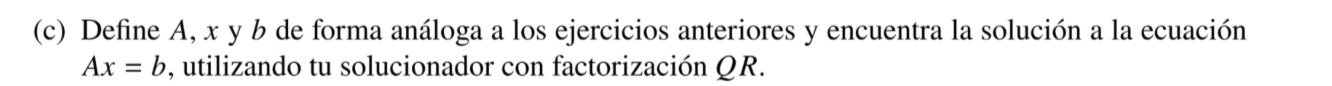

In [ ]:
np.random.seed(42)
A = np.random.rand(100, 100)  # Matriz A aleatoria de dimensión 100x100
x_real = np.arange(1, 101, dtype=np.float64)
b = A @ x_real  # Calcular b como b = A x

# Solucionador QR
x_calculado = resolver_qr(A, b)

print("Solución calculada x:")
print(x_calculado)

b_reconstruido = A @ x_calculado
print("\n¿Aproximadamente A x == b?", np.allclose(b, b_reconstruido))

Solución calculada x:
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.]

¿Aproximadamente A x == b? True


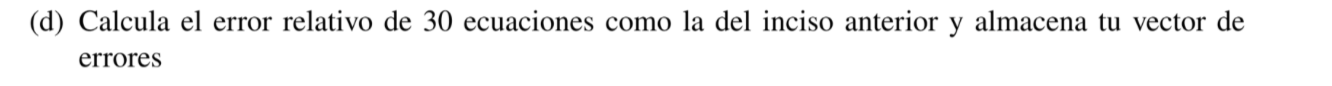

In [ ]:
errores_relativos_qr = []

for _ in range(30):
    # Generar una matriz A aleatoria 100x100
    A = np.random.rand(100, 100)

    # vector teórico
    x_real = np.arange(1, 101, dtype=np.float64)

    # Calcular b = A @ x_real
    b = A @ x_real

    # Resolver el sistema para x usando factorización QR
    x_calculado = resolver_qr(A, b)

    # Calcular el error relativo
    error_rel = calcular_error_relativo(x_real, x_calculado)
    errores_relativos_qr.append(error_rel)

errores_rel_qr = np.array(errores_relativos_qr)

print("Errores relativos de las 30 iteraciones:")
print(errores_rel_qr)

Errores relativos de las 30 iteraciones:
[9.78379869e-10 4.34639962e-10 3.83312562e-11 1.19429938e-11
 1.54692283e-10 3.39047729e-11 3.16716406e-11 3.25901648e-10
 2.14860380e-11 2.72161585e-10 2.19714636e-10 1.59719898e-11
 1.16383731e-10 1.69262749e-10 3.55834106e-11 4.22389612e-11
 1.42019587e-11 1.54585950e-11 6.37268710e-11 1.04231111e-09
 2.73602654e-10 6.67927637e-11 1.57292489e-11 1.77281204e-11
 1.80327451e-10 4.24783478e-11 7.92752722e-12 3.46006041e-11
 4.62922763e-11 2.59757882e-10]


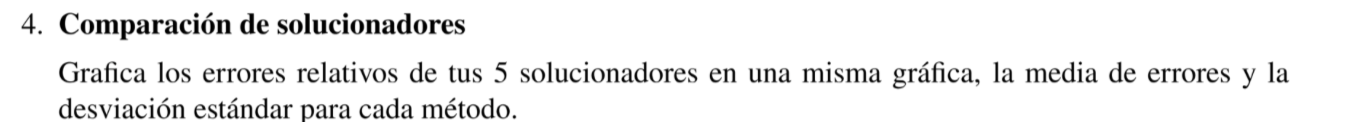

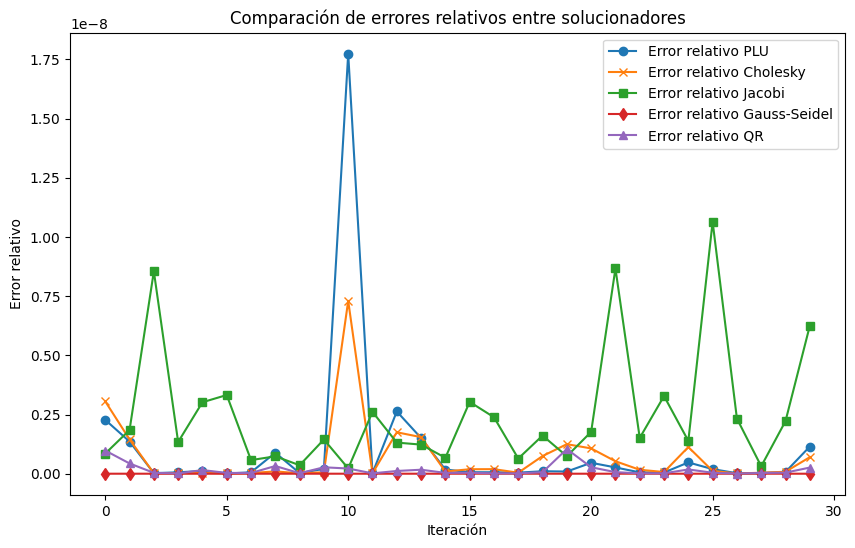

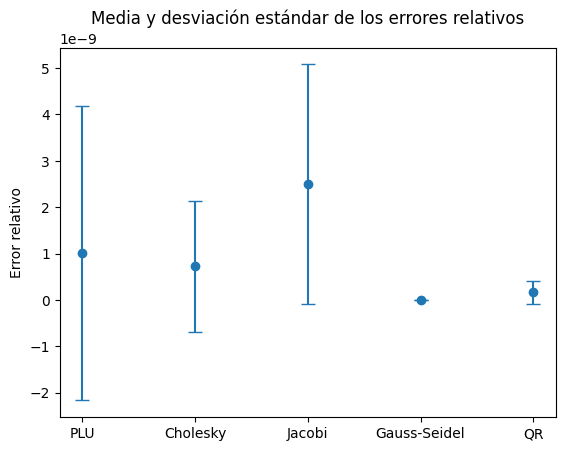

In [ ]:
# Calcular medias y desviaciones estándar
medias = [
    np.mean(errores_rel_plu), np.mean(errores_rel_cholesky),
    np.mean(errores_rel_jacobi), np.mean(errores_rel_gauss_seidel),
    np.mean(errores_rel_qr)
]

desviaciones = [
    np.std(errores_rel_plu), np.std(errores_rel_cholesky),
    np.std(errores_rel_jacobi), np.std(errores_rel_gauss_seidel),
    np.std(errores_rel_qr)
]

# Graficar los errores relativos de cada método
plt.figure(figsize=(10, 6))

plt.plot(errores_rel_plu, label='Error relativo PLU', marker='o')
plt.plot(errores_rel_cholesky, label='Error relativo Cholesky', marker='x')
plt.plot(errores_rel_jacobi, label='Error relativo Jacobi', marker='s')
plt.plot(errores_rel_gauss_seidel, label='Error relativo Gauss-Seidel', marker='d')
plt.plot(errores_rel_qr, label='Error relativo QR', marker='^')
plt.title('Comparación de errores relativos entre solucionadores')
plt.xlabel('Iteración')
plt.ylabel('Error relativo')
plt.legend()
plt.show()

metodos = ['PLU', 'Cholesky', 'Jacobi', 'Gauss-Seidel', 'QR']
plt.errorbar(metodos, medias, yerr=desviaciones, fmt='o', capsize=5)

plt.title('Media y desviación estándar de los errores relativos')
plt.ylabel('Error relativo')
plt.show()

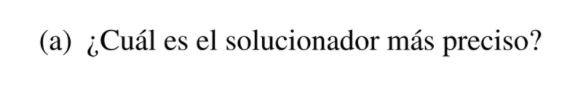

El método de **Gauss-Seidel** es el más preciso ya que muestra la *menor variación* y los errores relativos más bajos de todos los solucionadores visto en las graficas.

Por otra parte, podemos ver un gran contraste con el método de **QR** el cual tiene una gran dispersión en los errores relativos, mostrando picos altos y una gran desviación estándar por lo que es el menos preciso.

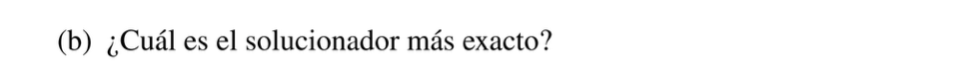

**Gauss-Seidel** parece ser el más exacto, ya que tiene una media baja de errores relativos y una desviación estándar prácticamente nula en comparación con los otros solucionadores. Por lo tanto, es consistente en sus resultados, lo que lo convierte en el *más exacto.*


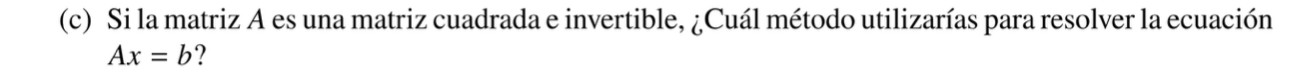

**PLU** lo usamos para matrices que son cuadradas e invertibles. Es eficiente y estable.

Sin embargo, si la matriz $A$ es además **simétrica y definida positiva**, **Cholesky** es más rápido y requiere menos operaciones que **PLU**, por lo que sería la mejor opción en ese caso específico.


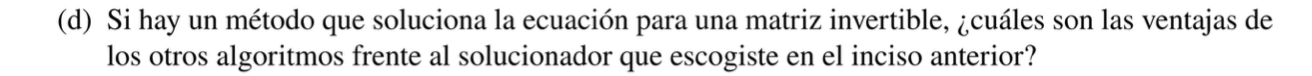

**Factorización QR**:
     Más estable numéricamente en casos donde la matriz no es bien condicionada o cuando la matriz se acerca a ser singular pero más costoso en términos de tiempo computacional en comparación con **PLU** o **Cholesky**.

**Método de Jacobi**: Funciona mejor si la matriz es muy grande o dispersa pero converge de forma más lenta que los métodos de factorización directa como **PLU** o **Cholesky**.

**Método de Gauss-Seidel**: Puede ser más rápido que **Jacobi** ya que utiliza valores actualizados en cada paso iterativo aunque son similares pero la velocidad en que converge depende de la matriz en sí.


Respecto al espacio ocupado todos tienen complejidad de $O(n^2)$

